In [120]:
import numpy as np
from scipy import optimize


In [209]:

#Defining variables:
m=1 #money
v=10 #v
e=0.3 #frisch
tau_0=0.4 #ltax
tau_1=0.1 #ttax
kappa=0.4 #cutoff
w=0.5

# Defining utility function and budget constraint:
def utility(l,c,e,v):
    # Returning utility from labour supply and consumption
    u=np.log(c)-v*l**(1+1/e)/(1+1/e)
    return u

def budget_constraint(m,w,l,tau_0,tau_1,kappa):
    # Returning total resources in terms of wage less taxes and cash
    budget=m+w*l-w*l*tau_0-tau_1*max((w*l-kappa),0)
    return budget

# Defining a function, setting consumption equal to budget (as we know, the consumer chooses to spend entire budget.),
# Making this function return the utility, while c = m (negatively, as scipy only can minimize).
# This is what we want to optimize.
def decision(l,w,e,v,tau_0,tau_1,kappa):
    c=budget_constraint(m,w,l,tau_0,tau_1,kappa)
    return -utility(l,c,e,v)

# Defining the optimizer-function, optimizing the consumer's decision function for l, given all other values in decision.
def optimizer(w,e,v,tau_0,tau_1,kappa,m):
    # Call the solver
    sol_case1 = optimize.minimize_scalar(
        decision,method='bounded',
        bounds=(0,1),args=(w,e,v,tau_0,tau_1,kappa))

    # Making the optimizer-function create a list of the three solution-values, l, c, and u.
    # Optimal labor equals the optimized solution in the function:
    lstar = sol_case1.x

    # Optimal consumption equals the budget constraint-function as we know, given the optimal l.
    cstar = budget_constraint(m,w,lstar,tau_0,tau_1,kappa)

    # Optimal utility must then be equal to the utility function given optimal l and c.
    ustar = utility(lstar,cstar,e,v)
    return [lstar,cstar,ustar]

# Draws out variables from the optimizer-list.
lstar = optimizer(w,e,v,tau_0,tau_1,kappa,m)[0]
cstar = optimizer(w,e,v,tau_0,tau_1,kappa,m)[1]
ustar = optimizer(w,e,v,tau_0,tau_1,kappa,m)[2]

def printsolution(w,e,v,tau_0,tau_1,kappa,m):
    print(f'Optimal labour supply is: {lstar:.3f}')
    print(f'Optimal consumption is: {cstar:.3f}')
    print(f'yielding a utility of: {ustar:.3f}')

printsolution(w,e,v,tau_0,tau_1,kappa,m)

Optimal labour supply is: 0.339
Optimal consumption is: 1.102
yielding a utility of: 0.076


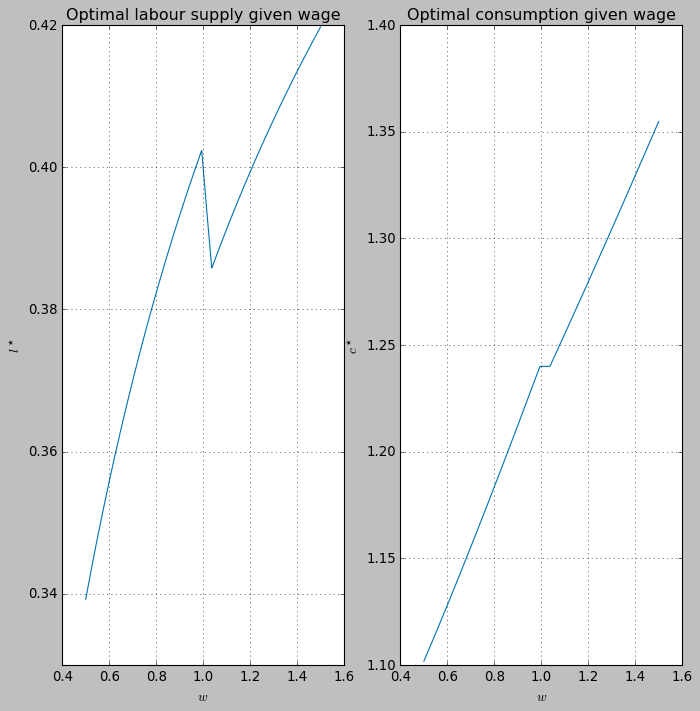

In [159]:

import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind")

N=1000
w_vec=np.linspace(0.5,1.5,N)
l_vec=np.empty(N)
c_vec=np.empty(N)
for i,w in enumerate(w_vec):
    bundle=optimiser(w,e,v,tau_0,tau_1,kappa,money)
    l_vec[i]=bundle[0]
    c_vec[i]=bundle[1]

# a. create a figure
fig = plt.figure(figsize=(10,10))

# c. left plot
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_vec,l_vec)

ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

# c. right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_vec,c_vec)

ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

In [189]:
N=10000
np.random.seed(1986)
wi_vec=np.random.uniform(0.5,1.5,size=N)
l_vec=np.empty(N)
c_vec=np.empty(N)
for i,w in enumerate(wi_vec):
    bundle=optimiser(w,e,v,tau_0,tau_1,kappa,m)
    l_vec[i]=bundle[0]
print(l_vec, c_vec)

[0.38862935 0.35226956 0.39199602 ... 0.35572067 0.41864827 0.41920972] [1.35224106e-311 1.35224135e-311 3.99332373e-001 ... 4.12805972e-001
 4.09120935e-001 3.48260884e-001]


In [190]:
tax_rev=lambda l_vec,wi_vec: tau_0*wi_vec*l_vec+tau_1*np.fmax(wi_vec*l_vec-kappa,0)
tax=tax_rev(l_vec,wi_vec)
print(tax)
np.sum(tax)


[0.16769816 0.08135148 0.17725977 ... 0.0853116  0.27029152 0.27264245]


1630.412448460049

In [193]:
e_1=0.1

N=10000
np.random.seed(1986)
wi_vec=np.random.uniform(0.5,1.5,size=N)
l_vec1=np.empty(N)
c_vec=np.empty(N)
for i,w in enumerate(wi_vec):
    bundle=optimiser(w,e_1,v,tau_0,tau_1,kappa,m)
    l_vec1[i]=bundle[0]
print(l_vec1, c_vec)

tax_rev=lambda l_vec1,wi_vec: tau_0*wi_vec*l_vec1+tau_1*np.fmax(wi_vec*l_vec1-kappa,0)
tax=tax_rev(l_vec1,wi_vec)
print(tax)
np.sum(tax)

[0.72013165 0.69283347 0.72198602 ... 0.68882816 0.73615868 0.73644821] [1.35224160e-311 1.35221446e-311 2.94942740e+179 ... 6.81444589e-038
 4.46964737e-033 3.24253045e-086]
[0.34486548 0.15999972 0.36015334 ... 0.16649992 0.50562222 0.50923575]


3196.6947029870807

In [210]:
def optimiser1(l_vec,wi_vec):
    sol_case2 = optimize.minimize_scalar(
        tax_rev,method='bounded',
        bounds=(0,1),args=(l_vec,wi_vec))
    sol_case2.x




    